In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob3.mat"
mat_data = scipy.io.loadmat(mat_path)

A = mat_data['A']
b = mat_data['b']
x_orig = mat_data['x_orig']

In [3]:
def normest_numpy(A):
    """
    NumPy를 이용하여 행렬 A의 2-노름을 추정하는 함수.
    """
    # SVD를 계산합니다. full_matrices=False로 설정하여 경제적 SVD를 수행합니다.
    U, s, V = scipy.sparse.linalg.svds(A)
    # 가장 큰 특이값 반환
    return s[0]

def Dh(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 1:cols] = u[:, 1:cols] - u[:, 0:cols-1]
    d[:, 0] = u[:, 0] - u[:, cols-1]
    return d

def Dht(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 0:cols-1] = u[:, 0:cols-1] - u[:, 1:cols]
    d[:, cols-1] = u[:, cols-1] - u[:, 0]
    return d

def Dv(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[1:rows, :] = u[1:rows, :] - u[0:rows-1, :]
    d[0, :] = u[0, :] - u[rows-1, :]
    return d

def Dvt(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[0:rows-1, :] = u[0:rows-1, :] - u[1:rows, :]
    d[rows-1, :] = u[rows-1, :] - u[0, :]
    return d

In [4]:
mu = 1
stopping_point = 2e-4

# # normest를 이용해 tau와 sigma 계산
norm_est = normest_numpy(A)
tau = 1 / norm_est**2
sigma = 1 / (tau * norm_est**2)

theta = 1/np.sqrt(1 + 2 * mu)

In [5]:
y1 = np.zeros(b.shape)
y2 = np.zeros((256,256))
y3 = np.zeros((256,256))
x = np.zeros((256,256))

y2 = Dh(x)
y3 = Dv(x)

for idx in range(10000):
    
    
    # update y
    y2 = np.sign(y2 + sigma * Dh(x)) * np.minimum(np.abs(y2 + sigma * Dh(x)), sigma)
    y3 = np.sign(y3 + sigma * Dv(x)) * np.minimum(np.abs(y3 + sigma * Dv(x)), sigma)
    
    x = x.reshape(65536, 1)
    y1 = ((y1 + sigma * A @ x) - (sigma * mu * b)) / (1 + sigma * mu)    
    
    # update x
    x_minus1 = x
    
    y2 = Dht(y2) 
    y3 = Dvt(y3)
    y2 = y2.reshape(65536, 1)
    y3 = y3.reshape(65536, 1)
    
    x = x - (tau * (A.T @ y1 + y2 + y3))
    x[x < 0] = 0
        

    x = x + theta * (x - x_minus1)

    x = x.reshape(256,256)
    y2 = y2.reshape(256,256)
    y3 = y3.reshape(256,256)
    x_minus1 = x_minus1.reshape(256,256)
    
    print(idx)
    if (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point:
        break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


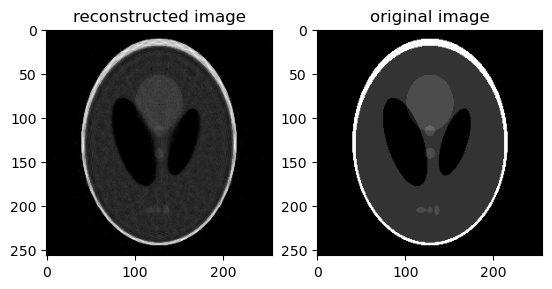

In [6]:
# original f 
x = x.reshape((256, 256))
plt.subplot(121)
plt.imshow(x.T, cmap = "gray")
plt.title( label = "reconstructed image")

 
x = x.reshape((256, 256))
plt.subplot(122)
plt.imshow(x_orig, cmap = "gray")
plt.title( label = "original image")

plt.show()